In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.linalg as la
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
br="brandrating.csv"
df_br = pd.read_csv(br)
#ubicacion de datos y notebook en mismo directorio

#### 0. Exploración de Datos

In [4]:
df_br.tail()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
995,2,2,3,6,4,8,5,1,2,j
996,3,2,6,7,1,3,3,2,1,j
997,1,1,10,10,1,6,5,5,2,j
998,1,1,7,5,1,1,2,5,1,j
999,7,4,7,8,4,1,2,5,1,j


In [5]:
df_br.describe() 
#No hay Outliers ni faltan datos en ningún los atributos
# todos los atributos con calificación limitada desde 1 a 10
# 1000 registros en total, matriz de 1000x10

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,4.488000,4.417000,6.195000,6.06800,4.323000,4.259000,4.33700,5.220000,3.727000
std,3.203454,2.608432,3.078059,2.74425,2.778199,2.667027,2.39858,2.742101,2.544592
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,1.000000,2.000000,4.000000,4.00000,2.000000,2.000000,2.00000,3.000000,1.000000
50%,4.000000,4.000000,7.000000,6.00000,4.000000,4.000000,4.00000,5.000000,3.000000
75%,7.000000,6.000000,9.000000,8.00000,6.000000,6.000000,6.00000,7.000000,5.000000
max,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000


In [6]:
df_br.isnull().sum().sort_values(ascending=False) 
####  Búsqueda de NaN  ####  Tipo de datos

perform    0
leader     0
latest     0
fun        0
serious    0
bargain    0
value      0
trendy     0
rebuy      0
brand      0
dtype: int64

In [8]:
print(df_br.brand.unique()) #detalle de marcas: 10 marcas identificadas con una letra

['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j']


#### 1. Heatmap de Correlación entre atributos

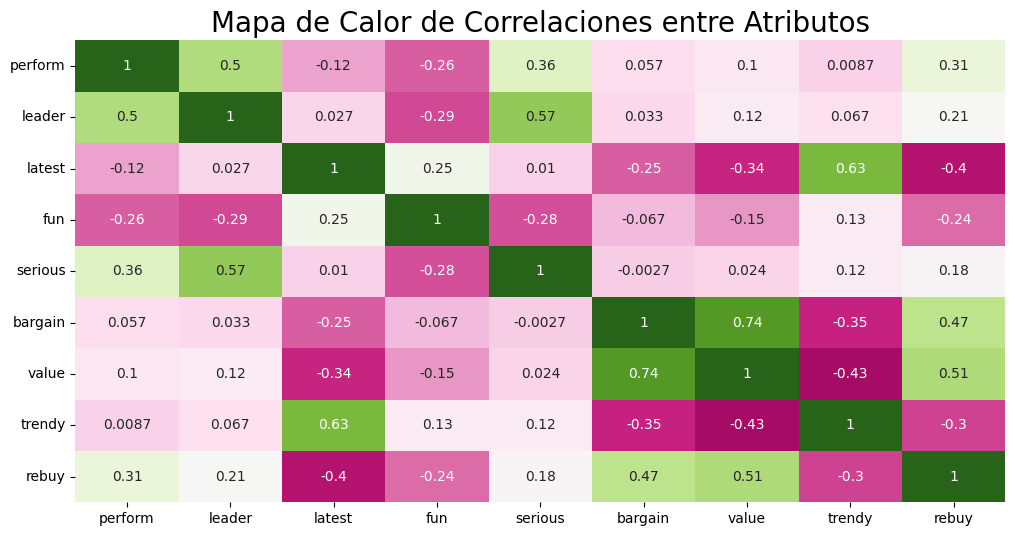

In [13]:
#heatmap de correlaciones
atributos=df_br.iloc[:,:-1] #Quitamos dato marcas y (vector salida) # atributos = X (matriz entrada)
plt.figure(figsize=(12,6)) 
plt.title("Mapa de Calor de Correlaciones entre Atributos", fontsize=20)
s=sns.heatmap(atributos.corr(), annot =True, cmap='PiYG',vmin=-0.5, vmax=0.9, cbar=False)
#s.set_yticklabels(s.get_yticklabels(), fontsize=10)
#s.set_xticklabels(s.get_xticklabels(), fontsize=10) #Para cambio de tamaño, rotacion, etc
plt.show()

* La matriz es simétrica dado que la correlación no mide direccionalidad (causalidad) de las variables, sino que solo su relación lineal.

* Gracias al mapa de calor y los colores se puede identificar rápidamente qué variables se correlacionan con más fuerza, tanto proporcional (>0) como inversamente proporcional (<0).

* Por ejemplo, muestra un comportamiento proporcional "value" y "bargain"; "trendy" y "latest". Por otro lado, son inversamente proporcionales "value y trendy"; "latest" y "rebuy".

* Esta proporcionalidad entre atributos es lo que permite reducir el número de dimensiones (o variables), ya que podemos "expresar conjuntamente" dichos atributos en una nueva variable (componente principal), minimizando el sacrificio de información.  

#### 2. Cálculo Componentes Principales



In [14]:
#Es necesario Estandarizar los datos
scaler = StandardScaler()
new_data = scaler.fit_transform(atributos)

In [16]:
#chequear si la media es cero y la desviación estandard es 1 (revisión normalización)
mean = np.mean(new_data)
print(np.round(mean, decimals=1))
print(np.std(new_data))

0.0
0.9999999999999999


In [20]:
pca = PCA(n_components=7) #dimensiones para PCA **Debe ser menor a la cantidad de variables actuales = 9**
pca.fit(new_data) #fit con data normalizada en formato listas
pca7 = pca.transform(new_data) #convierto los 9 atributos en 7 componentes principales
print(pca7.shape) #matriz de 7 columnas equivalente a los PC

(1000, 7)


In [24]:
#proporcion de la varianza explicada por cada PCA
print('Varianza explicada PCA nueva matriz ',pca7.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('Suma 3 primeras varianzas: ', sum(expl[:3]))
print('Suma 5 primeras varianzas: ', sum(expl[:5]))

Varianza explicada PCA nueva matriz  (1000, 7)
[0.33103284 0.23295019 0.11991721 0.08080122 0.07083844 0.05942703
 0.04334494]
Suma 3 primeras varianzas:  0.6839002346857312
Suma 5 primeras varianzas:  0.8355398914471835


* **La varianza que explican los 3 primeros componentes principales es de 0.684**, lo que equivale a la información "guardada o representada" por esos "nuevos 3 atributos". **La varianza explicada por los 5 primeros PCA es de 0.836**

#### 3. Grafico Varianza Explicada

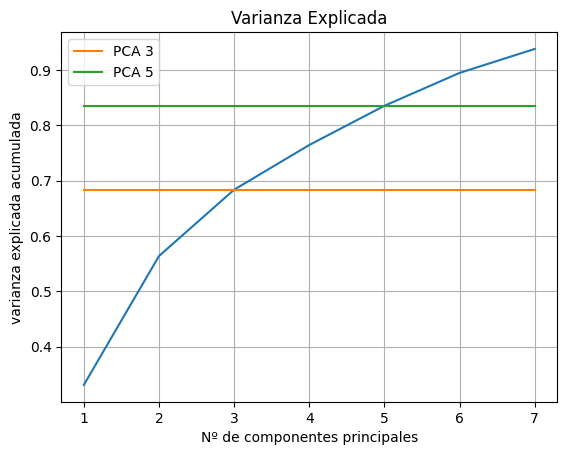

In [25]:
#graficar la curva de varianza acumulada
plt.plot(range(1,8),np.cumsum(pca.explained_variance_ratio_)) #suma amuculada
plt.plot([1,7],[sum(expl[:3]),sum(expl[:3])],label="PCA 3")
plt.plot([1,7],[sum(expl[:5]),sum(expl[:5])],label="PCA 5")
plt.title('Varianza Explicada')
plt.xlabel('Nº de componentes principales')
plt.ylabel('varianza explicada acumulada')
plt.grid()
plt.legend()
plt.show()

* A través de este gráfico es posible notar que la inclusión de una nueva componente principal agrega cada vez menos información. 

#### 4. Correlacion de Atributos y Componentes Principales

In [29]:
#transformar a un dataframe los datos estandarizados
data2 = pd.DataFrame(new_data, columns=atributos.columns)
#Agregar los 5 primeros PC a las columnas del DF estandarizado
for i in range(5):
  data2["PC(%i)" %(i+1)] = pca7[:,i]

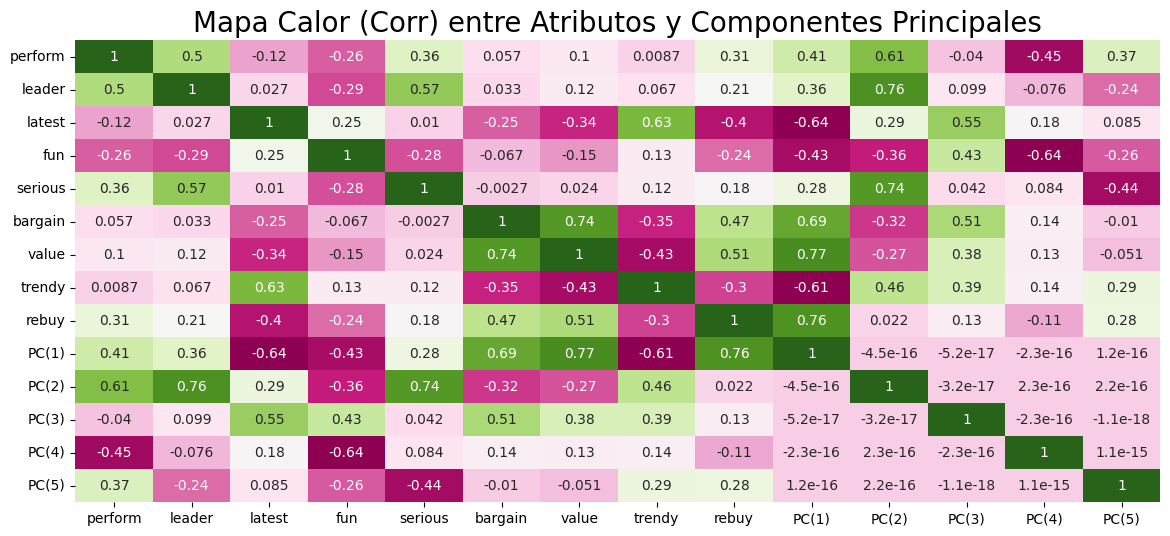

In [30]:
#heatmap de correlaciones incluidos 5 de los PC (principal components)
plt.figure(figsize=(14,6))
plt.title("Mapa Calor (Corr) entre Atributos y Componentes Principales", fontsize=20)
s=sns.heatmap(data2.corr(), annot =True, cmap='PiYG',vmin=-0.5, vmax=0.9, cbar=False)
#s.set_yticklabels(s.get_yticklabels(), fontsize=10)
#s.set_xticklabels(s.get_xticklabels(), fontsize=10)
plt.show()

* El valor de correlación entre el Componente principal 2 y el atributo "leader" es de 0.76, lo que significa que esta característica está fuertemente representada por este componente principal.

* Además el Componente principal 2 está altamente correlacionada con el atributo "serious" (0.74), seguido tabién de "perform" con un 0.61. Se puede concluir que el PC(2) permitirá representar estos atributos en un nuevo sistema de 2 o más componentes principales (variables).

* Lo anterior también se puede verificar rápidamente con el PC(4) y las variables "perform" y "fun", aunque este compomponente principal las representará de forma inversamente proporcional, en un sistema de 4 o más componentes principales.

* Finalmente, **del heatmap se puede verificar que el PC_1 es el que guarda más información respecto al resto, ya que es el componente principal que tiene mayor correlación con el mayor número de atributos**. Esto le permite representar al máximo número de variables posibles (lo que se comprueba en su alta varianza explicada de forma individual).

#### 5. Agregación de Atributos {marca "e" y "a"}

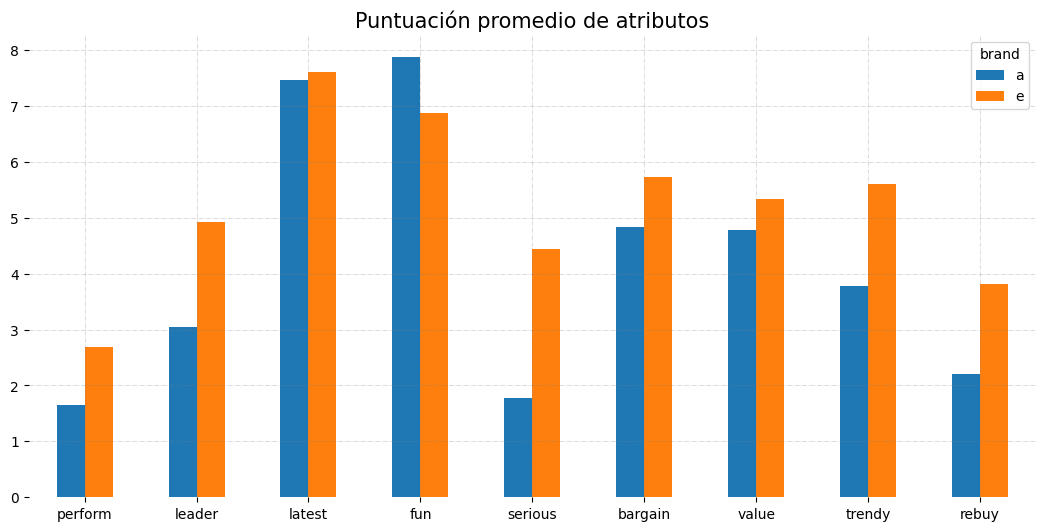

In [32]:
data_5 = df_br.groupby("brand").mean() #agregación o pivot por marca + calculo de promedios
F = data_5.iloc[[0,4],:].T #selección de marcas y trasposición para gráfico
ax = F.plot(kind='bar', figsize=(13, 6))
ax.set_title("Puntuación promedio de atributos", fontsize=15)
ax.set_xticklabels(F.index.tolist(),rotation=0)
ax.grid(color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.4)
for s in ['top', 'bottom', 'left', 'right']: #eliminar marco de gráfico a sus costados
    ax.spines[s].set_visible(False)
plt.show()

In [33]:
F.T #revisión de puntaje promedio obtenido por ambas marcas comparadas

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
brand,,,,,,,,,
a,1.65,3.04,7.46,7.87,1.77,4.83,4.78,3.78,2.21
e,2.68,4.92,7.60,6.88,4.44,5.73,5.34,5.60,3.82


* Se puede ver desde el gráfico y desde la tabla anterior que **la marca "e" es mejor que la marca "a" en todos los atributos, menos en "fun"**. Esto de acuerdo al promedio que tiene cada marca en cada atributo.